In [1]:
# Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers, models

In [2]:
# Read the labels.csv file and check shape and records
labels_all = pd.read_csv("C:/Users/archa/OneDrive/Documents/3rd Sem/Deep Learning/Project/archive (2)/labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
# Loading number or each breed
breed_all = labels_all['breed']
breed_count = breed_all.value_counts()
breed_count.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [4]:
# Selecting all breeds because i have high computation power
CLASS_NAME = ['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher', 'bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAME))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,80,01ee3c7ff9bcaba9874183135877670e,entlebucher
4,88,021b5a49189665c0442c19b5b33e8cf1,entlebucher


In [5]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAME)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    #img = image.load_img("C:/Users/archa\OneDrive/Documents/3rd Sem/Deep Learning/Project/train/00a338a92e4e7bf543340dc849230e75.jpg" % labels['id'][i], target_size=(224, 224))
    img = image.load_img("C:/Users/archa/OneDrive/Documents/3rd Sem/Deep Learning/Project/train/{}.jpg".format(labels['id'][i]), target_size=(224, 224))

    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0

# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 588/588 [00:03<00:00, 183.19it/s]


Train Images shape:  (588, 224, 224, 3)  size: 88,510,464
One-hot encoded output shape:  (588, 5)  size: 2,940


In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               16056576  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                      

In [8]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.2)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [9]:
batch_size = 128
epochs = 50

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Training the model with data augmentation
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_val, Y_val))

Epoch 1/50



3/3 [==============================] - 41s 9s/step - loss: 6.3988 - accuracy: 0.4016 - val_loss: 3.9416 - val_accuracy: 0.6702
Epoch 2/50
3/3 [==============================] - 19s 6s/step - loss: 4.4317 - accuracy: 0.6968 - val_loss: 1.2307 - val_accuracy: 0.8723
Epoch 3/50
3/3 [==============================] - 18s 6s/step - loss: 1.1939 - accuracy: 0.8830 - val_loss: 1.4075 - val_accuracy: 0.9043
Epoch 4/50
3/3 [==============================] - 19s 6s/step - loss: 1.6897 - accuracy: 0.8777 - val_loss: 1.5391 - val_accuracy: 0.9043
Epoch 5/50
3/3 [==============================] - 20s 6s/step - loss: 1.2155 - accuracy: 0.9309 - val_loss: 1.3532 - val_accuracy: 0.9043
Epoch 6/50
3/3 [==============================] - 17s 6s/step - loss: 0.4134 - accuracy: 0.9548 - val_loss: 1.2822 - val_accuracy: 0.9043
Epoch 7/50
3/3 [==============================] - 18s 6s/step - loss: 0.6999 - accuracy: 0.9229 - val_loss: 1.1429 - val_accuracy: 0.9362
Epoch 8/50
3/3 [=============================

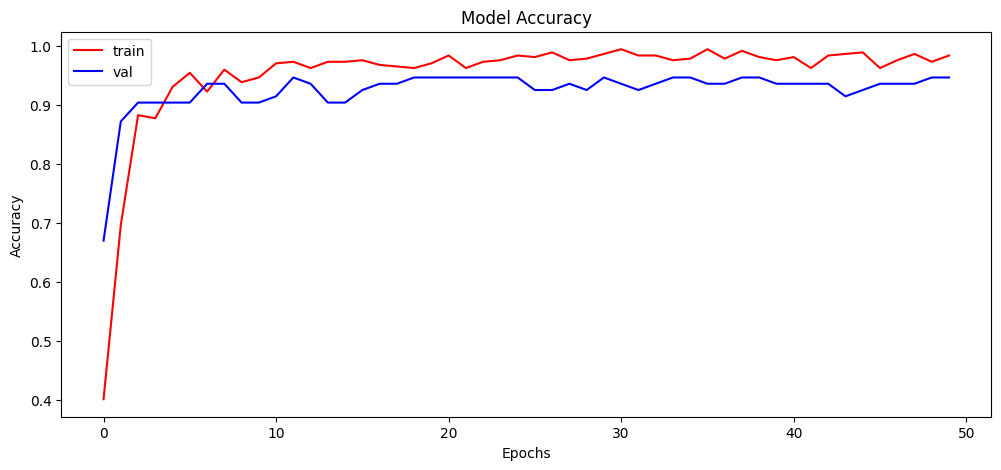

In [10]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [11]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

4/4 [==============================] - 3s 821ms/step - loss: 0.5360 - accuracy: 0.9746
Accuracy over the test set: 
  97.46 %


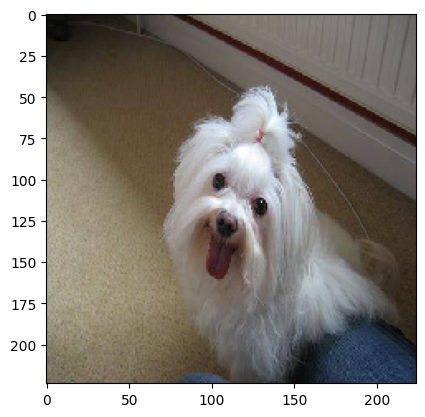

Originally :  maltese_dog
Predicted :  maltese_dog


In [12]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])